In [1]:
print("Akshat Jain")

Akshat Jain


# Step-1: Data Pre-processing
## 1. Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import warnings
# Note: Corrected 'ignore )' from document
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## 2.Importing the dataset using the pandas library

In [3]:
data = pd.read_csv("drug.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
data.shape 

(200, 6)

In [5]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


## 3. Handling the missing values

In [6]:
print('Handling missing values in the dataset:')
print(data.isnull().sum())

Handling missing values in the dataset:
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


## 4. Exploratory Data Analysis

<Axes: xlabel='Drug', ylabel='count'>

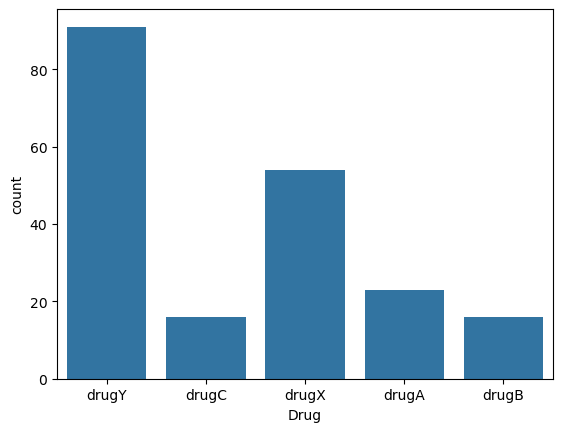

In [18]:
# Note: Corrected 'data data' from document
sns.countplot(x="Drug", data=data)

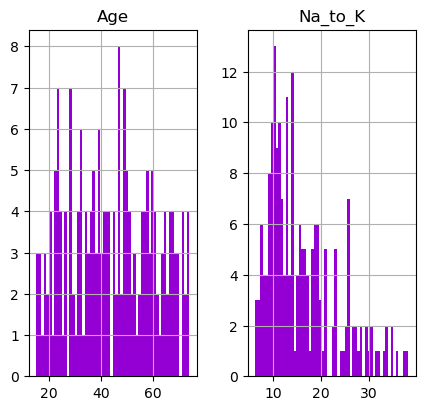

In [9]:
# Note: Corrected 'color= darkviolet'' from document
data.hist(bins=60, figsize=(5,4.5), color='darkviolet'); plt.show()

# Step-2: Creating categorical encoding for 'Sex', 'BP', 'Cholesterol'.

In [10]:
LE = LabelEncoder() 
data['Sex'] = LE.fit_transform(data['Sex']) 
# Note: Corrected 'data[ BP"]' from document
data['BP'] = LE.fit_transform(data['BP']) 
# Note: Corrected 'data 'Cholesterol']' from document
data['Cholesterol'] = LE.fit_transform(data['Cholesterol'])  
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


# Step-3: Extracting independent and dependent variables

In [11]:
# Note: Corrected variable assignment from document
X = data.drop('Drug', axis=1)
# Note: Corrected '$y=$ data 'Drug"]' from document
y = data['Drug']

# Step-4: Splitting the dataset into Training and Testing dataset

In [ ]:
# Note: Corrected 'test size 9.2' and 'random_state=e' from document
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0) 

# Step-5: Fitting Decision Tree to the Training set

In [13]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

# Step-6: Predicting the Test Result

In [14]:
y_pred = classifier.predict(X_test) 
y_pred 

array(['drugC', 'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugY', 'drugY', 'drugY',
       'drugB', 'drugC', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugA', 'drugX'], dtype=object)

# Step-7: Test accuracy of the result

In [15]:
# Test accuracy of the result [cite: 690]
classification_report(y_test, y_pred) 

'              precision    recall  f1-score   support\n\n       drugA       1.00      1.00      1.00         3\n       drugB       1.00      1.00      1.00         1\n       drugC       1.00      1.00      1.00         3\n       drugX       1.00      1.00      1.00        14\n       drugY       1.00      1.00      1.00        19\n\n    accuracy                           1.00        40\n   macro avg       1.00      1.00      1.00        40\nweighted avg       1.00      1.00      1.00        40\n'

In [16]:
cm = confusion_matrix(y_test, y_pred) 
cm 

array([[ 3,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0, 14,  0],
       [ 0,  0,  0,  0, 19]])

# Step-8: Finding the Accuracy of the model

In [17]:
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy * 100, "%") 

Accuracy: 100.0 %


# Hence, the accuracy of the model is 100%.